In [141]:
"""
Three types of fit:
1. Underfit (high bias) - Model too different from training set
2. General fit - Model fits training set good enough and also generalizes to new data
3. Overfit (high variance) - Model too accurate for training set, at the cost of generalization 
"""

'\nThree types of fit:\n1. Underfit (high bias) - Model too different from training set\n2. General fit - Model fits training set good enough and also generalizes to new data\n3. Overfit (high variance) - Model too accurate for training set, at the cost of generalization \n'

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [143]:
# linear regression using MSE cost function and gradient descent algorithm
class LinReg:
    def __init__(self, dataX=np.array([]), dataY=np.array([])):
        self.dataX = dataX
        self.dataY = dataY
        self.w = 0
        self.b = 0
    def reset(self):
        self.w = 0
        self.b = 0
    def model(self, x):
        return self.w*x + self.b
    def cost(self):
        return 1/(2*len(self.dataX)) * sum((self.model(self.dataX)-self.dataY)**2)
    def wDeri(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY) * self.dataX)
    def bDeri(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY))
    def train(self, alpha, iterations):
        costArr = []
        for _ in range(iterations):
            self.w, self.b = self.w - alpha*self.wDeri(), self.b - alpha*self.bDeri()
            costArr.append(self.cost())
        return costArr
    def chooseLearningRate(self, start, factor):
        alphaChoices = factor**np.arange(8) * start
        X = np.arange(10)
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle("no. of iterations vs cost", fontsize=16, y=1.05)
        axes = axes.flatten()
        for i, alpha in enumerate(alphaChoices):
            self.reset()
            costArr = self.train(alpha, 10)
            axes[i].plot(X, costArr, label=f'alpha = {alpha:.4f}')
            axes[i].legend()
        plt.tight_layout()
        plt.show()
        

In [144]:
class QuadReg:
    def __init__(self, dataX=np.array([]), dataY=np.array([])):
        self.dataX = dataX
        self.dataY = dataY
        self.w2 = self.w1 = self.b = 0
    def model(self, x):
        return self.w2*x**2 + self.w1*x + self.b
    def cost(self):
        return 1/(2*len(self.dataX)) * sum((self.model(self.dataX)-self.dataY)**2)
    def w2Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX**2)
    def w1Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX)
    def bDer(self):
        return 1/len(self.dataX) * sum(self.model(self.dataX)-self.dataY)
    def train(self, alpha, iterations):
        for _ in range(iterations):
            temp_w2 = self.w2 - alpha*self.w2Der()
            temp_w1 = self.w1 - alpha*self.w1Der()
            temp_b = self.b - alpha*self.bDer()
            self.w2 = temp_w2
            self.w1 = temp_w1
            self.b = temp_b

In [145]:
class HexReg:
    def __init__(self, dataX=np.array([]), dataY=np.array([])):
        self.dataX = dataX
        self.dataY = dataY
        self.w6 = self.w5 = self.w4 = self.w3 = self.w2 = self.w1 = self.b = 0
    def model(self, x):
        return self.w6*x**6 + self.w5*x**5 + self.w4*x**4 + self.w3*x**3 + self.w2*x**2 + self.w1*x + self.b
    def cost(self):
        return 1/(2*len(self.dataX)) * sum((self.model(self.dataX)-self.dataY)**2)
    def w6Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX**6)
    def w5Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX**5)
    def w4Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX**4)
    def w3Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX**3)
    def w2Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX**2)
    def w1Der(self):
        return 1/len(self.dataX) * sum((self.model(self.dataX)-self.dataY)*self.dataX)
    def bDer(self):
        return 1/len(self.dataX) * sum(self.model(self.dataX)-self.dataY)
    def train(self, alpha, iterations):
        for _ in range(iterations):
            temp_w6 = self.w6 - alpha*self.w6Der()
            temp_w5 = self.w5 - alpha*self.w5Der()
            temp_w4 = self.w4 - alpha*self.w4Der()
            temp_w3 = self.w3 - alpha*self.w3Der()
            temp_w2 = self.w2 - alpha*self.w2Der()
            temp_w1 = self.w1 - alpha*self.w1Der()
            temp_b = self.b - alpha*self.bDer()
            self.w6 = temp_w6
            self.w5 = temp_w5
            self.w4 = temp_w4
            self.w3 = temp_w3
            self.w2 = temp_w2
            self.w1 = temp_w1
            self.b = temp_b

In [146]:
n = 5
trueW6, trueW5, trueW4, trueW3, trueW2, trueW1, trueB = 0.001, -1, 1, 1, 1, 1, 4
noiseLvl = 10
dataX = np.arange(n)
dataY = trueW6*dataX**6 +trueW5*dataX**5 +trueW4*dataX**4 +trueW3*dataX**3 +trueW2*dataX**2 +trueW1*dataX +trueB + noiseLvl*np.random.randn(n)

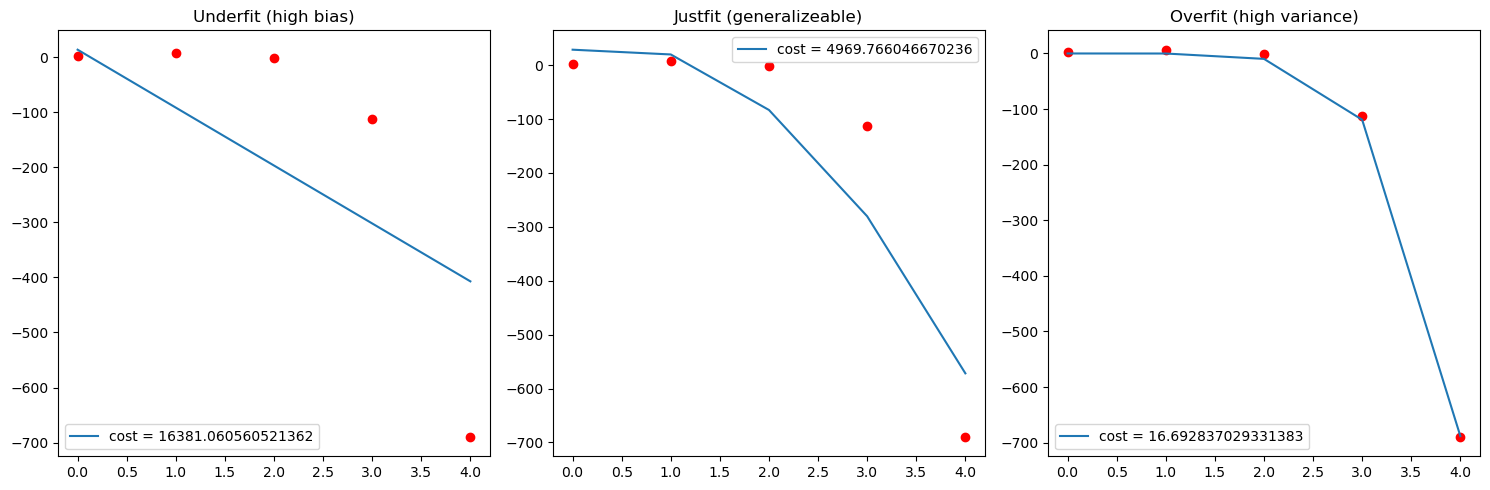

In [147]:
lrModel = LinReg(dataX, dataY)
# lrModel.chooseLearningRate(1e-3, 5) # 0.1250 is suitable
alpha = 1e-3
lrModel.train(alpha, 1000)

alpha = 1e-3
qrModel = QuadReg(dataX, dataY)
qrModel.train(alpha, 1000)

alpha = 5e-7
hrModel = HexReg(dataX, dataY)
hrModel.train(alpha, 1000)

size = 5
fig, axes = plt.subplots(1, 3, figsize=(3 * size, size))
for i in range(3):
    axes[i].scatter(dataX, dataY, c='r')
    
axes[0].plot(dataX, lrModel.w*dataX+lrModel.b, label=f'cost = {lrModel.cost()}')
axes[0].set_title("Underfit (high bias)")
axes[1].plot(dataX, qrModel.w2*dataX**2 +qrModel.w1*dataX +qrModel.b, label=f'cost = {qrModel.cost()}')
axes[1].set_title("Justfit (generalizeable)")
axes[2].plot(dataX, hrModel.w6*dataX**6 +hrModel.w5*dataX**5 +hrModel.w4*dataX**4 +hrModel.w3*dataX**3 +hrModel.w2*dataX**2 +hrModel.w1*dataX +hrModel.b, label=f'cost = {hrModel.cost()}')
axes[2].set_title("Overfit (high variance)")
for i in range(3): axes[i].legend()
plt.legend()
plt.tight_layout()
plt.show()